In [27]:
%pip install xgboost

In [15]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("../data/HousingData.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


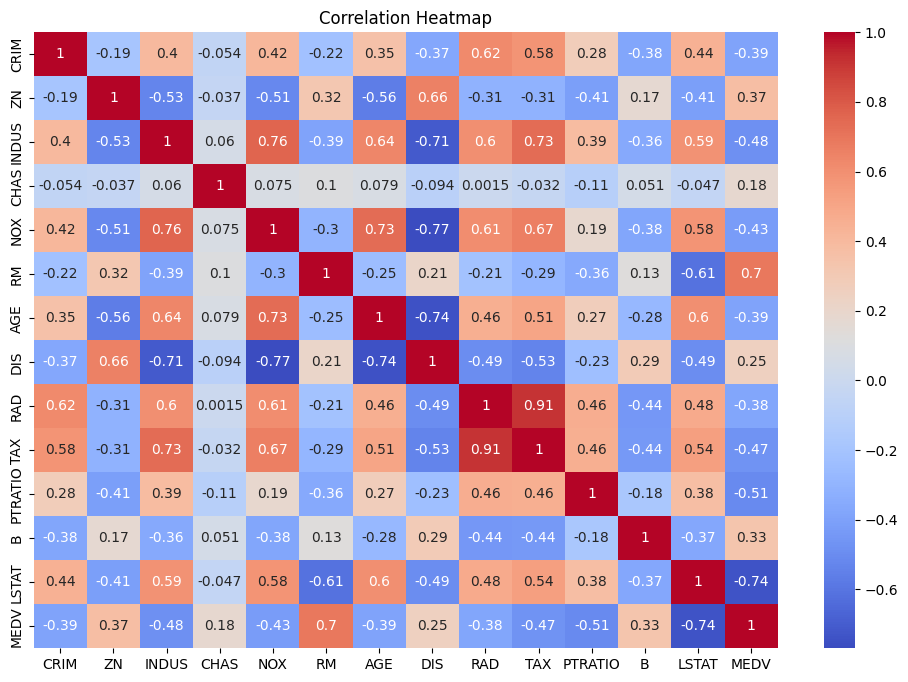

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

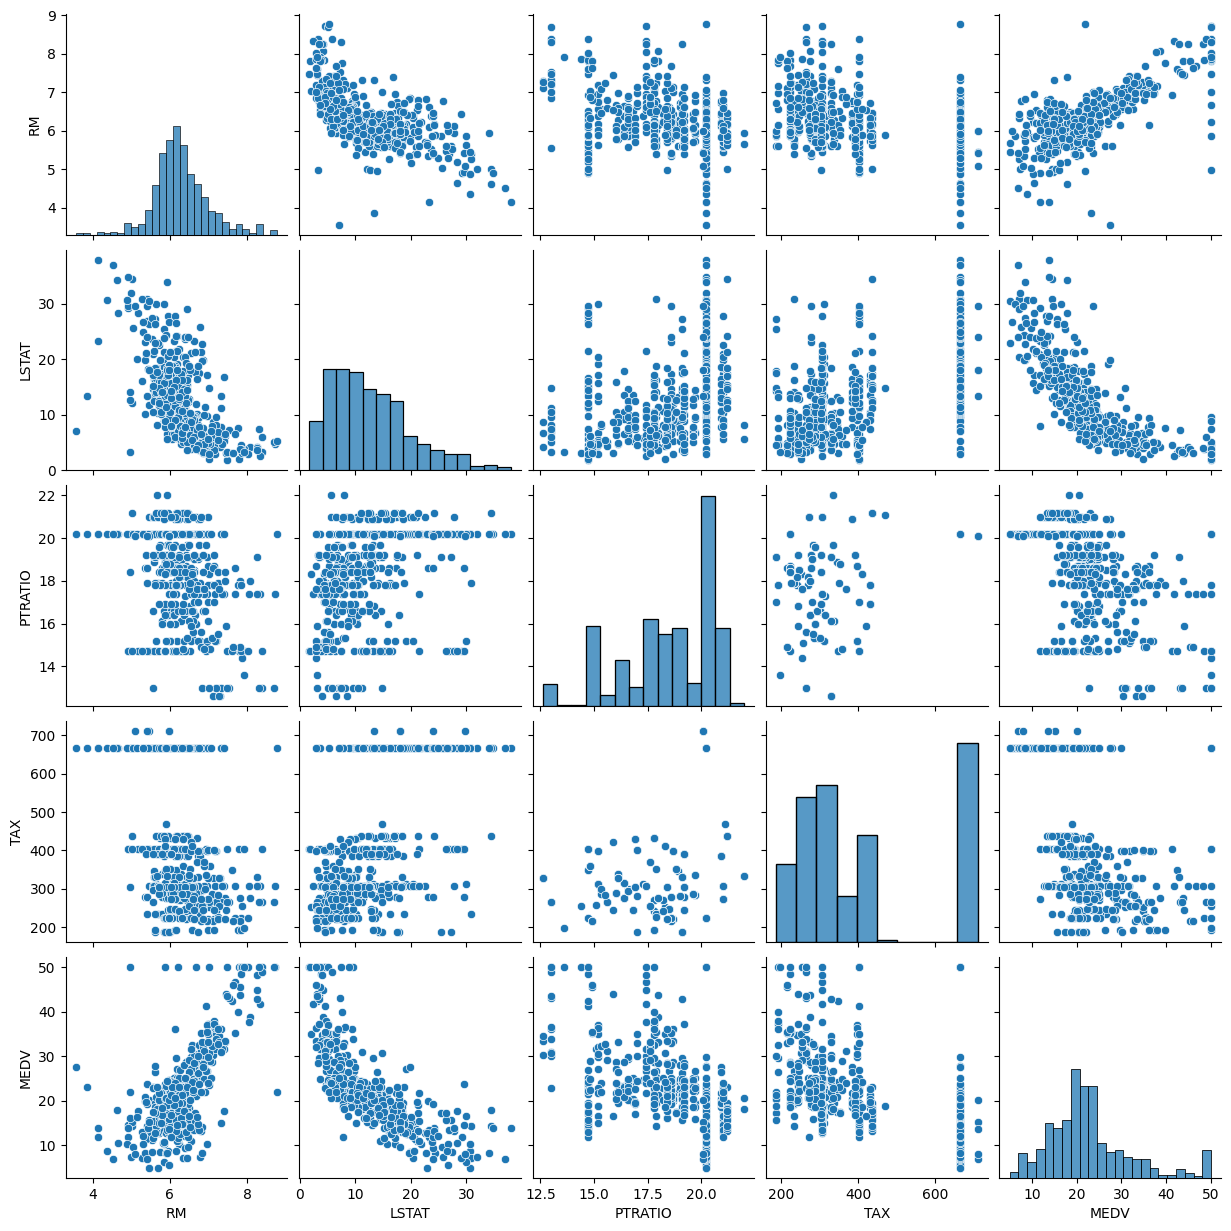

In [18]:
sns.pairplot(df[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'MEDV']])

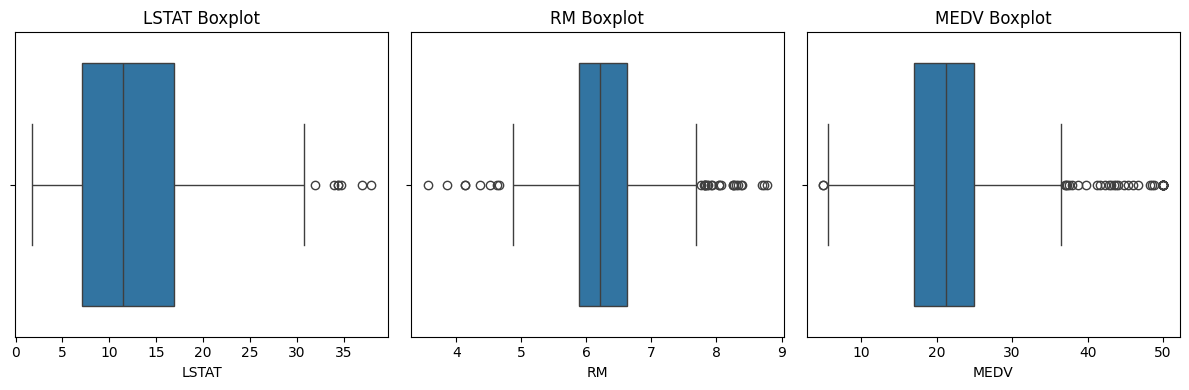

In [19]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(['LSTAT', 'RM', 'MEDV']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers(df, 'LSTAT')
df = remove_outliers(df, 'RM')



In [21]:
# Ensure all columns are numeric
df = df.select_dtypes(include=[np.number])

# Drop rows with NaNs in the target
df = df.dropna(subset=['MEDV'])

# Split into X and y
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




In [23]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R2 Score:", r2_score(y_test, lr_preds))


Linear Regression RMSE: 3.802722671419937
Linear Regression R2 Score: 0.6926945663043849


In [25]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("XGBoost R2 Score:", r2_score(y_test, xgb_preds))


XGBoost RMSE: 2.7219858771502516
XGBoost R2 Score: 0.8425463739169294


In [26]:
joblib.dump(lr_model, "../models/linear_model.pkl")
joblib.dump(xgb_model, "../models/xgb_model.pkl")


['../models/xgb_model.pkl']